In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

In [12]:
def ks_2samp(sample1, sample2):
    # Gets all observations
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    # Sorts the samples
    sample1.sort()
    sample2.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in observations:
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    return {"ks_stat": ks_stat, "p_value" : p_value}

### T_E KS test

### Are equal

In [13]:
log_t_e_pbh = np.random.normal(loc = 0, scale = 1, size = 450)
log_t_e_ffp = np.random.uniform(low = -1, high = 1, size = 50)
log_t_e_total_ffp = np.concatenate((log_t_e_pbh, log_t_e_ffp))
log_t_e_total_pbh = np.random.normal(loc = 0, scale = 1, size = 500)

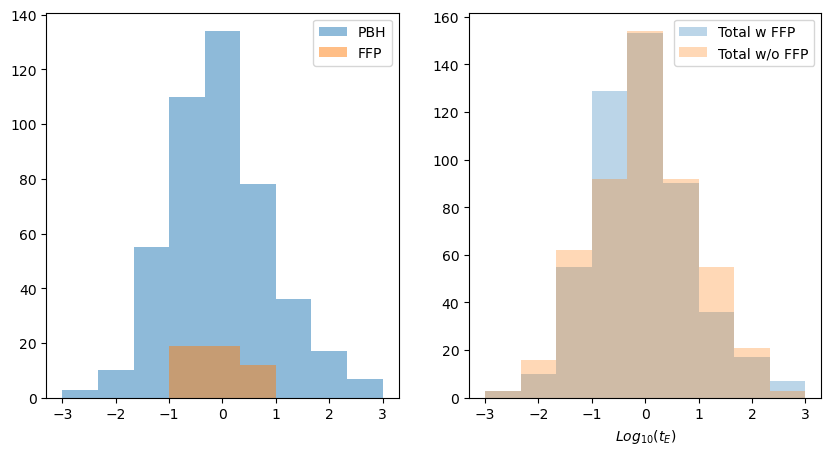

In [14]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.hist(log_t_e_pbh, bins=np.linspace(-3,3,10), alpha = 0.5, label = "PBH")
plt.hist(log_t_e_ffp, bins=np.linspace(-3,3,10), alpha = 0.5, label = "FFP")
plt.legend()

plt.subplot(1,2,2)
plt.hist(log_t_e_total_ffp, bins=np.linspace(-3,3,10), alpha = 0.3, label = "Total w FFP")
plt.hist(log_t_e_total_pbh, bins=np.linspace(-3,3,10), alpha = 0.3, label = "Total w/o FFP")
plt.xlabel(r'$Log_{10} (t_E)$')
plt.legend()
plt.show()

In [15]:
ks = ks_2samp(log_t_e_total_ffp, log_t_e_total_pbh)
print(f"FFP vs No FFP: ks = {ks['ks_stat']:.4f} (p-value = {ks['p_value']:.3e}, are equal = {ks['p_value'] > 0.05})")


FFP vs No FFP: ks = 0.0680 (p-value = 1.891e-01, are equal = True)


### Are not equal

In [16]:
log_t_e_pbh = np.random.normal(loc = 0, scale = 1, size = 450)
log_t_e_ffp = np.random.uniform(low = 1, high = 3, size = 50)
log_t_e_total_ffp = np.concatenate((log_t_e_pbh, log_t_e_ffp))
log_t_e_total_pbh = np.random.normal(loc = 0, scale = 1, size = 500)

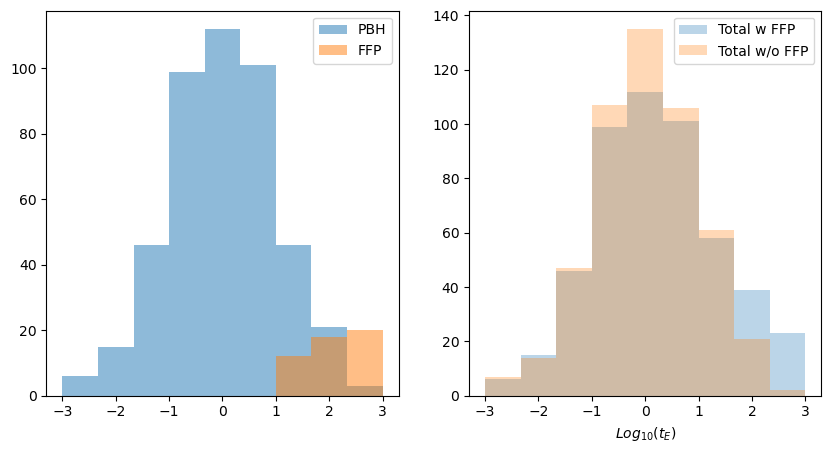

In [17]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.hist(log_t_e_pbh, bins=np.linspace(-3,3,10), alpha = 0.5, label = "PBH")
plt.hist(log_t_e_ffp, bins=np.linspace(-3,3,10), alpha = 0.5, label = "FFP")
plt.legend()

plt.subplot(1,2,2)
plt.hist(log_t_e_total_ffp, bins=np.linspace(-3,3,10), alpha = 0.3, label = "Total w FFP")
plt.hist(log_t_e_total_pbh, bins=np.linspace(-3,3,10), alpha = 0.3, label = "Total w/o FFP")
plt.xlabel(r'$Log_{10} (t_E)$')
plt.legend()
plt.show()

In [18]:
ks = ks_2samp(log_t_e_total_ffp, log_t_e_total_pbh)
print(f"FFP vs No FFP: ks = {ks['ks_stat']:.4f} (p-value = {ks['p_value']:.3e}, are equal = {ks['p_value'] > 0.05})")


FFP vs No FFP: ks = 0.0880 (p-value = 3.913e-02, are equal = False)
